# Proyek Analisis Data: Bike Sharing Dataset
- Nama:Andi Dwi Prastyo
- Email: andidprastyo@gmail.com
- Id Dicoding: andidprastyo

## Menentukan Pertanyaan Bisnis

- pertanyaan 1 : Bagaimana waktu—baik jam harian, perbedaan antara hari kerja dan hari libur, serta perubahan musiman bulanan—berdampak pada tingkat permintaan untuk menyewa sepeda?
- pertanyaan 2 : Bagaimana kondisi cuaca, suhu, tingkat kelembaban udara, dan perubahan musim berpengaruh terhadap permintaan untuk menyewa sepeda?

## Menyiapkan semua library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv('./Dataset/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv('./Dataset/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

##### Table : day_df

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
day_df.duplicated().sum()

0

In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


##### Table : hour_df

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
hour_df.duplicated().sum()

0

In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [12]:
# Dropping unnecessary columns : instant and dteday
day_df.drop(columns=["instant","dteday","casual","registered"],axis=1,inplace =True)
hour_df.drop(columns=["instant","dteday", "casual", 'registered'],axis=1,inplace =True)

## Exploratory Data Analysis (EDA)

### Explore day_df

In [13]:
day_df.sample(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
13,1,0,1,0,5,1,1,0.160870,0.188413,0.537826,0.126548,1421
444,1,1,3,0,2,1,1,0.560833,0.538533,0.807917,0.121271,6093
473,2,1,4,0,3,1,2,0.463333,0.457038,0.569167,0.167912,4367
672,4,1,11,0,6,0,2,0.343333,0.323846,0.491250,0.270529,5138
348,4,0,12,0,4,1,2,0.422500,0.412237,0.634167,0.268042,3709


In [14]:
day_df.describe(include="all")

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,8714.000000


### Explore hour_df

In [15]:
hour_df.sample(5)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
16176,4,1,11,18,0,0,0,1,0.52,0.5000,0.45,0.1343,405
13560,3,1,7,5,0,2,1,1,0.66,0.6061,0.83,0.1045,50
9847,1,1,2,7,1,1,0,2,0.22,0.1970,0.55,0.3284,44
3935,2,0,6,21,0,5,1,1,0.64,0.5909,0.78,0.0896,208
9608,1,1,2,7,0,5,1,1,0.20,0.2121,0.59,0.1642,230


In [16]:
hour_df.describe(include="all")

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


### Merging dataset

In [17]:
bike_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="right"
)

#please run this code again, when you meet any error or runtime disconnected

In [18]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,hr
0,1,0,1,0,6,0,1,0.24,0.2879,0.81,0.0,16,0
1,1,0,1,0,6,0,1,0.22,0.2727,0.80,0.0,40,1
2,1,0,1,0,6,0,1,0.22,0.2727,0.80,0.0,32,2
3,1,0,1,0,6,0,1,0.24,0.2879,0.75,0.0,13,3
4,1,0,1,0,6,0,1,0.24,0.2879,0.75,0.0,1,4


In [19]:
bike_df.tail()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,hr
17374,1,1,12,0,1,1,2,0.26,0.2576,0.60,0.1642,119,19
17375,1,1,12,0,1,1,2,0.26,0.2576,0.60,0.1642,89,20
17376,1,1,12,0,1,1,1,0.26,0.2576,0.60,0.1642,90,21
17377,1,1,12,0,1,1,1,0.26,0.2727,0.56,0.1343,61,22
17378,1,1,12,0,1,1,1,0.26,0.2727,0.65,0.1343,49,23


In [20]:
bike_df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,hr
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088,11.546752
std,1.106918,0.500008,3.438776,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599,6.914405
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000,6.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000,12.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000,18.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000,23.000000


## Visualization & Explanatory Analysis

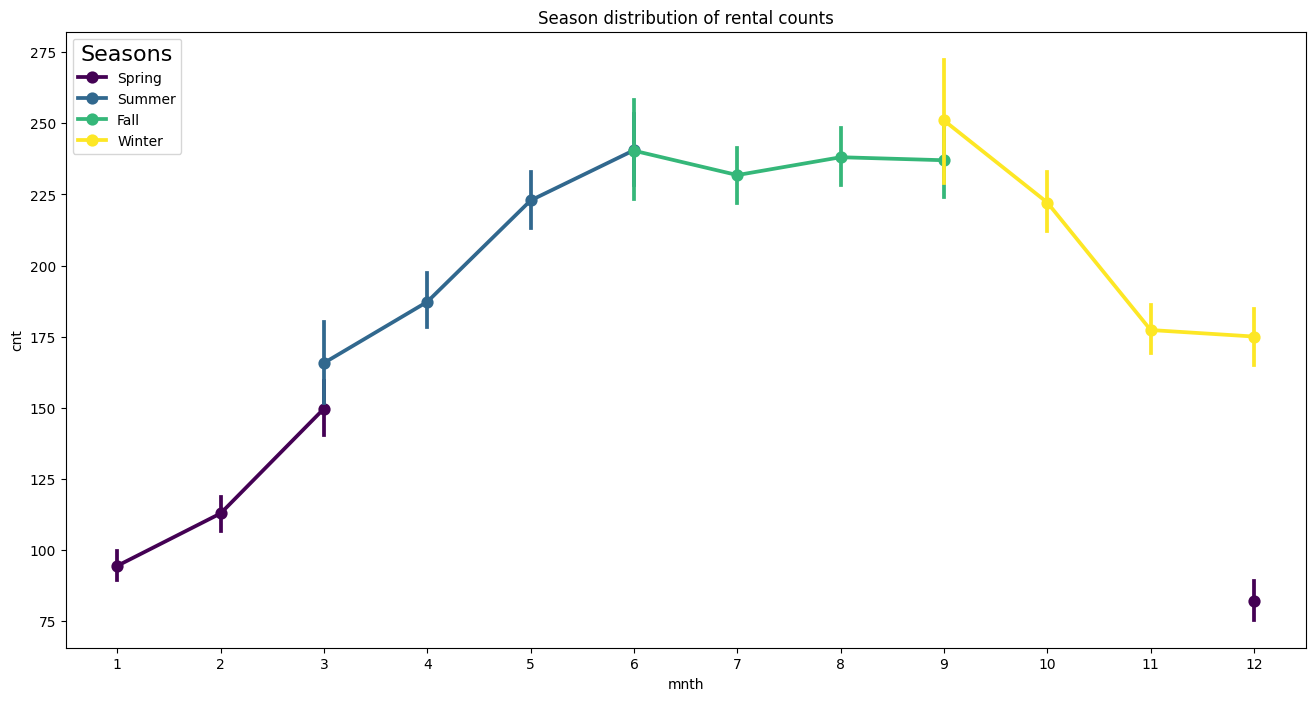

In [21]:
# Visualizing monthly counts across the seasons

# Create a dictionary to map numeric season values to season names
season_labels = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
custom_cmap = 'viridis'

fig, ax = plt.subplots(figsize=(16, 8))
sns.pointplot(data=bike_df[['mnth', 'cnt', 'season']],
              x='mnth',
              y='cnt',
              hue='season',
              palette=custom_cmap)

ax.set(title='Season distribution of rental counts')

# Customizing the legend
legend = ax.legend(title='Season', loc='upper left')
legend.set_title('Seasons', prop={'size': 16})

# Change the legend labels using the season_labels dictionary
for i, text in enumerate(legend.texts):
    text.set_text(season_labels[i + 1])

plt.show()


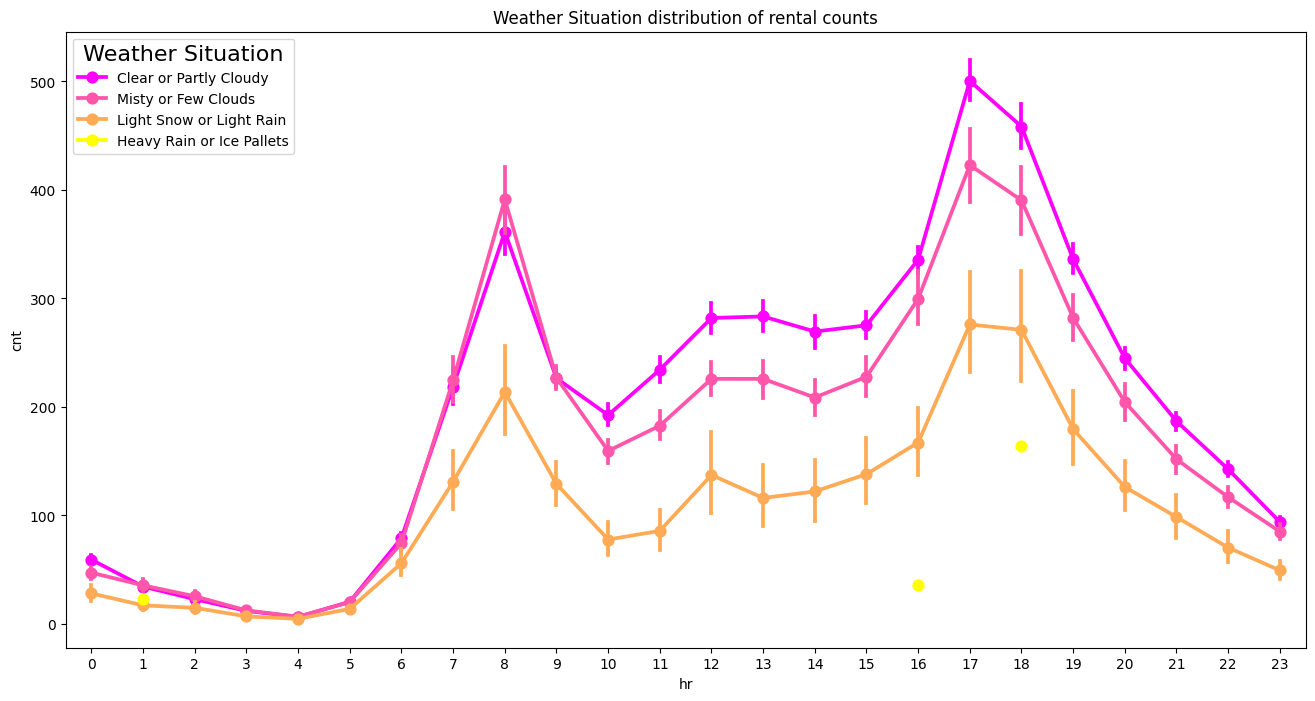

In [22]:
# Visualizing monthly counts across different weathers

# Create a dictionary to map numeric weathersit values to weathersit names
weathersit_labels = {1: 'Clear or Partly Cloudy', 2: 'Misty or Few Clouds', 3: 'Light Snow or Light Rain', 4: 'Heavy Rain or Ice Pallets'}
custom_cmap = 'spring'

fig, ax = plt.subplots(figsize=(16, 8))
sns.pointplot(data=bike_df[['hr', 'cnt', 'weathersit']],
              x='hr',
              y='cnt',
              hue='weathersit',
              palette=custom_cmap)

ax.set(title='Weather Situation distribution of rental counts')

# Customizing the legend
legend = ax.legend(title='Weather Situation', loc='upper left')
legend.set_title('Weather Situation', prop={'size': 16})
# Change the legend labels using the weathersit_labels dictionary
for i, text in enumerate(legend.texts):
    text.set_text(weathersit_labels[i + 1])

plt.show()

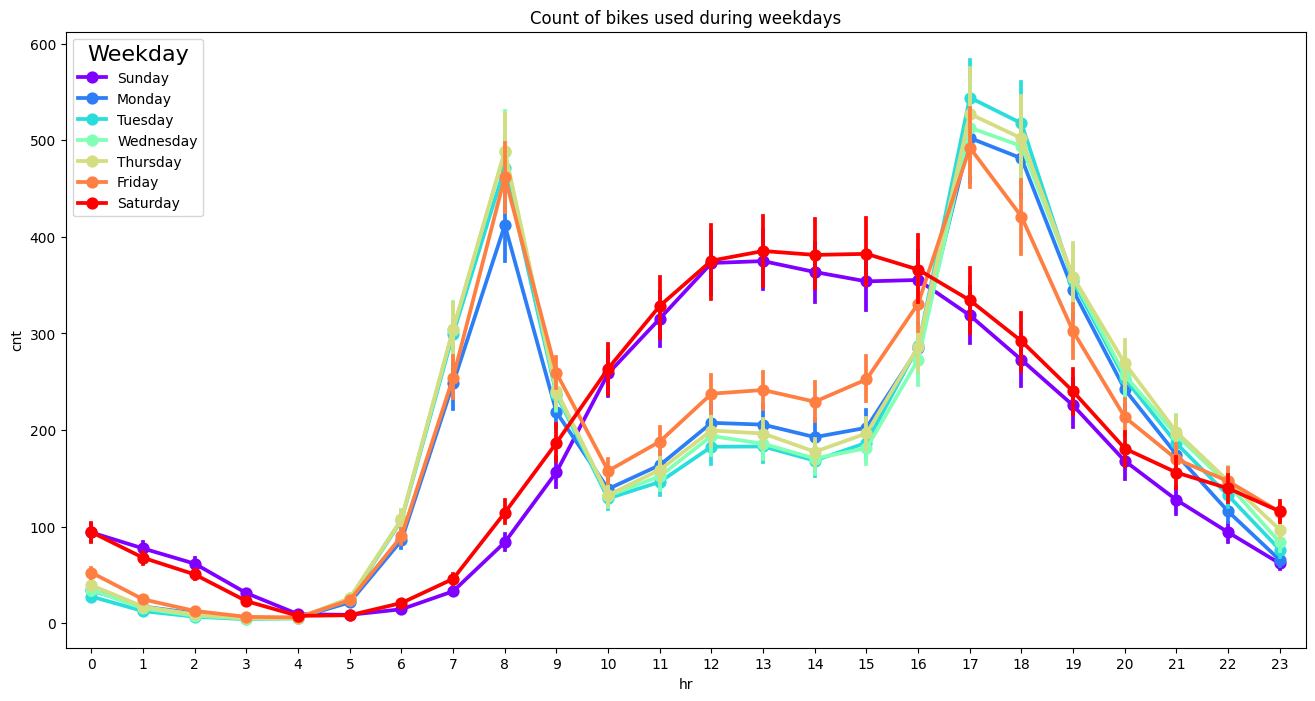

In [23]:
# Visualizing weekday counts

# Create a dictionary to map numeric weekday values to weekday names
weekday_labels = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
custom_cmap = 'rainbow'

fig, ax = plt.subplots(figsize=(16, 8))
sns.pointplot(data=bike_df[['hr', 'cnt', 'weekday']],
              x='hr',
              y='cnt',
              hue='weekday',
              palette=custom_cmap)

ax.set(title='Count of bikes used during weekdays')

# Customizing the legend
legend = ax.legend(title='Weekday', loc='upper left')
legend.set_title('Weekday', prop={'size': 16})
# Change the legend labels using the weekday_labels dictionary
for i, text in enumerate(legend.texts):
    text.set_text(weekday_labels[i])

plt.show()



[Text(0.5, 1.0, 'Monthly rental distribution')]

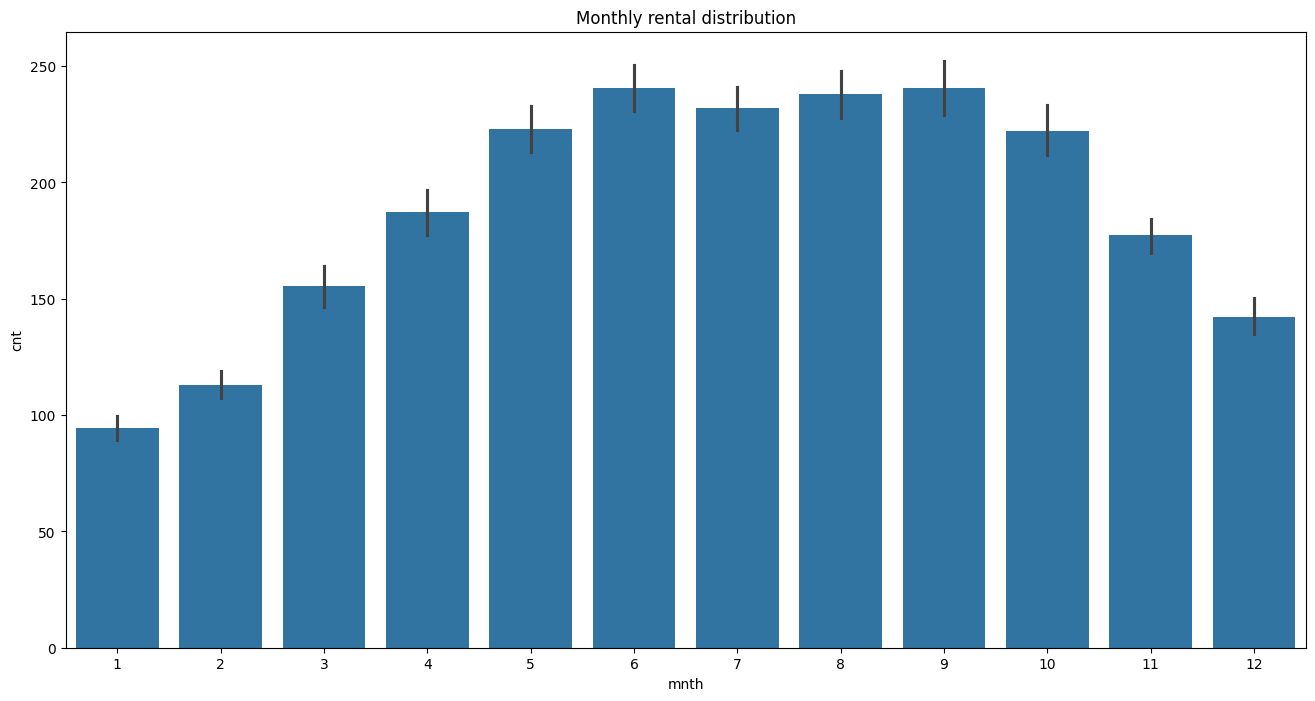

In [24]:
# Visualizing monthly counts
fig,ax=plt.subplots(figsize=(16,8))
sns.barplot(data=bike_df[['mnth','cnt']],
            x='mnth',
            y='cnt')
ax.set(title='Monthly rental distribution')

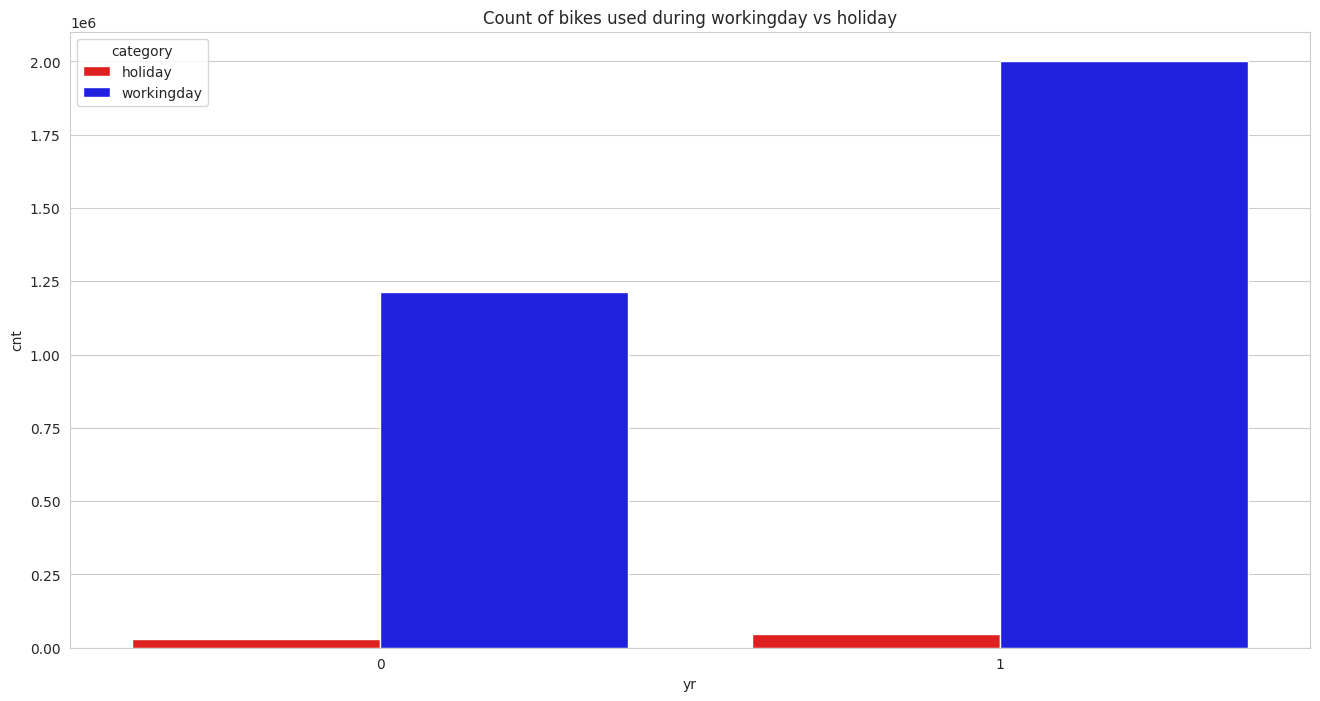

In [25]:
# Visualizing holiday vs workday counts
bike_df['category'] = bike_df['holiday'].apply(lambda x: 'holiday' if x else 'workingday')
bike_df = bike_df.groupby(['category','yr']).agg({
        'cnt': 'sum'
    }).reset_index()
custom_palette = {'holiday': 'red', 'workingday': 'blue'}
sns.set_style('whitegrid')
fig,ax=plt.subplots(figsize=(16, 8))
sns.barplot(x='yr',
            y='cnt',
            hue='category',
            data=bike_df,
            palette=custom_palette)
ax.set(title='Count of bikes used during workingday vs holiday')
plt.show()

### Pertanyaan 1:

In [ ]:
bike_df[["hr","yr","mnth","holiday","weekday","workingday","cnt"]].corr()

,hr,yr,mnth,holiday,weekday,workingday,cnt
hr,1.000000,-0.003867,-0.005772,0.000479,-0.003498,0.002285,0.394071
yr,-0.003867,1.000000,-0.010473,0.006692,-0.004485,-0.002196,0.250495
mnth,-0.005772,-0.010473,1.000000,0.018430,0.010400,-0.003477,0.120638
holiday,0.000479,0.006692,0.018430,1.000000,-0.102088,-0.252471,-0.030927
weekday,-0.003498,-0.004485,0.010400,-0.102088,1.000000,0.035955,0.026900
workingday,0.002285,-0.002196,-0.003477,-0.252471,0.035955,1.000000,0.030284
cnt,0.394071,0.250495,0.120638,-0.030927,0.026900,0.030284,1.000000


### Pertanyaan 2:

In [ ]:
bike_df[["temp","atemp","hum","windspeed","season", "weathersit","cnt"]].corr()

,temp,atemp,hum,windspeed,season,weathersit,cnt
temp,1.000000,0.987672,-0.069881,-0.023125,0.312025,-0.102640,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.319380,-0.105563,0.400929
hum,-0.069881,-0.051918,1.000000,-0.290105,0.150625,0.418130,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,-0.149773,0.026226,0.093234
season,0.312025,0.319380,0.150625,-0.149773,1.000000,-0.014524,0.178056
weathersit,-0.102640,-0.105563,0.418130,0.026226,-0.014524,1.000000,-0.142426
cnt,0.404772,0.400929,-0.322911,0.093234,0.178056,-0.142426,1.000000


## Conclusion

- Conclution pertanyaan 1

Permintaan sewa sepeda lebih tinggi pada hari kerja dibandingkan dengan hari libur, dengan perbedaan yang jelas. Pada hari kerja, puncak permintaan terjadi dari 5 pagi hingga 9 pagi dan dari 5 sore hingga 9 malam, sedangkan pada akhir pekan, puncak permintaan adalah dari 9 pagi hingga 4 sore. Bulan Juni sampai September menunjukkan puncak permintaan yang stabil, sementara dari Desember hingga Februari terjadi penurunan yang signifikan dalam permintaan.


- Conclution pertanyaan 2

Cuaca yang cerah meningkatkan permintaan sewa sepeda, sementara badai salju dan hujan lebat mengurangi permintaan secara signifikan. Musim gugur memunculkan peningkatan permintaan sewa sepeda, namun permintaan menurun saat musim semi tiba. Saat suhu rendah dan kelembaban udara tinggi, permintaan sewa sepeda cenderung menurun.

In [ ]:
bike_df.to_csv("bike_data.csv", index=False)